In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("corona_tested.csv")
df.head(5)

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,True,False,True,False,False,negative,NaN,NaN,Abroad
1,2,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
2,3,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
3,4,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Abroad
4,5,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Contact with confirmed


In [3]:
print(df.shape)

(278848, 11)


In [4]:
df.dtypes

Ind_ID                  int64
Test_date              object
Cough_symptoms         object
Fever                  object
Sore_throat            object
Shortness_of_breath    object
Headache               object
Corona                 object
Age_60_above           object
Sex                    object
Known_contact          object
dtype: object

In [5]:
# Select only object categorical columns
cat_columns = df.select_dtypes(include=['object'])

# Iterate through each column and print unique values
for column in cat_columns.columns:
    unique_values = df[column].unique()
    print(f"{column}: {unique_values}")

Test_date: ['11-03-2020' '12-03-2020' '13-03-2020' '14-03-2020' '15-03-2020'
 '16-03-2020' '17-03-2020' '18-03-2020' '19-03-2020' '20-03-2020'
 '21-03-2020' '22-03-2020' '23-03-2020' '24-03-2020' '25-03-2020'
 '26-03-2020' '27-03-2020' '28-03-2020' '29-03-2020' '30-03-2020'
 '31-03-2020' '01-04-2020' '02-04-2020' '03-04-2020' '04-04-2020'
 '05-04-2020' '06-04-2020' '07-04-2020' '08-04-2020' '09-04-2020'
 '10-04-2020' '11-04-2020' '12-04-2020' '13-04-2020' '14-04-2020'
 '15-04-2020' '16-04-2020' '17-04-2020' '18-04-2020' '19-04-2020'
 '20-04-2020' '21-04-2020' '22-04-2020' '23-04-2020' '24-04-2020'
 '25-04-2020' '26-04-2020' '27-04-2020' '28-04-2020' '29-04-2020'
 '30-04-2020']
Cough_symptoms: [True False nan]
Fever: [False True nan]
Sore_throat: [True False nan]
Shortness_of_breath: [False True nan]
Headache: [False True nan]
Corona: ['negative' 'positive' 'other']
Age_60_above: [nan 'No' 'Yes']
Sex: [nan 'male' 'female']
Known_contact: ['Abroad' 'Contact with confirmed' 'Other']


## Data Preprocessing 

In [6]:
print(df.isna().sum())

Ind_ID                      0
Test_date                   0
Cough_symptoms            252
Fever                     252
Sore_throat                 1
Shortness_of_breath         1
Headache                    1
Corona                      0
Age_60_above           127320
Sex                     19563
Known_contact               0
dtype: int64


In [7]:
# Drop the not in use columns
df = df.drop(columns=['Age_60_above', 'Sex', 'Known_contact'])

In [8]:
# Remove 'Other' in corona column
df = df[df['Corona'] != 'other']

In [9]:
# Drop cough_syptons and fever column with NaN
df = df.dropna()

In [10]:
print(df.isna().sum())
print(df.shape)

Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
dtype: int64
(274702, 8)


In [11]:
len(df[df["Corona"] == "positive"])

14694

In [12]:
len(df[df["Corona"] == "negative"])

260008

# Task

a) Calculate prior probabilities, sensitivity, and specificity. 

b) Use Bayes’ Theorem to determine the posterior probability of having the disease given a positive test result.

c) Analyze test results for a group of patients and interpret the findings. 

d) Discuss how sensitivity, specificity, and prevalence affect the results.

$$
Prevalence = P(Disease)
$$


$$
Sensitivity = \frac {TP}  {(TP + FN)} 
$$

$$
Specificity = \frac {TN}  {(TN + FP)} 
$$


$$
P(Corona \mid Attribute) = \frac{P(Attribute \mid Corona) \cdot P(Corona)}{P(Attribute)}
$$

In [13]:
# 1. Calculate Prior Probabilities (Prevalence) for the disease

# Count the total number of cases
total_cases = len(df)
# Count the number of positive disease cases
positive_cases = len(df[df["Corona"] == "positive"])

# Calculate the prevalence (Prior Probability) P(Disease)
prevalence = positive_cases / total_cases 

# Display Prevalence
print(f"\nPrevalence (P(Disease)): {prevalence:.4f}")


Prevalence (P(Disease)): 0.0535



Analyzing the attribute: Cough_symptoms
Sensitivity: 0.4479
Specificity: 0.8654
Posterior Probability of having the disease given a positive test result (P(Corona | Cough_symptoms)): 0.1583


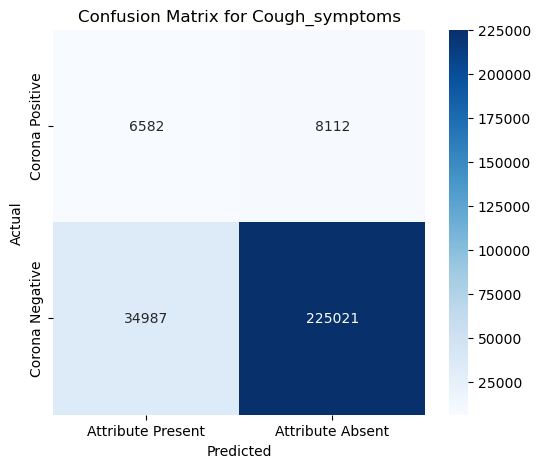


Analyzing the attribute: Fever
Sensitivity: 0.3782
Specificity: 0.9392
Posterior Probability of having the disease given a positive test result (P(Corona | Fever)): 0.2600


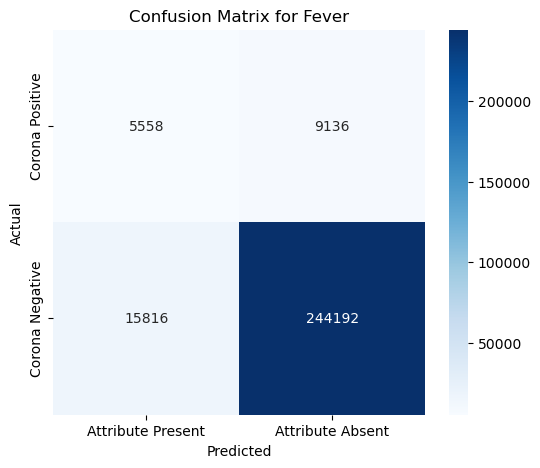


Analyzing the attribute: Sore_throat
Sensitivity: 0.1036
Specificity: 0.9986
Posterior Probability of having the disease given a positive test result (P(Corona | Sore_throat)): 0.8067


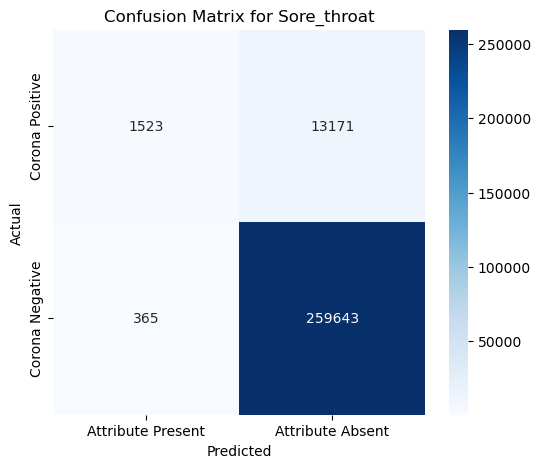


Analyzing the attribute: Shortness_of_breath
Sensitivity: 0.0791
Specificity: 0.9985
Posterior Probability of having the disease given a positive test result (P(Corona | Shortness_of_breath)): 0.7516


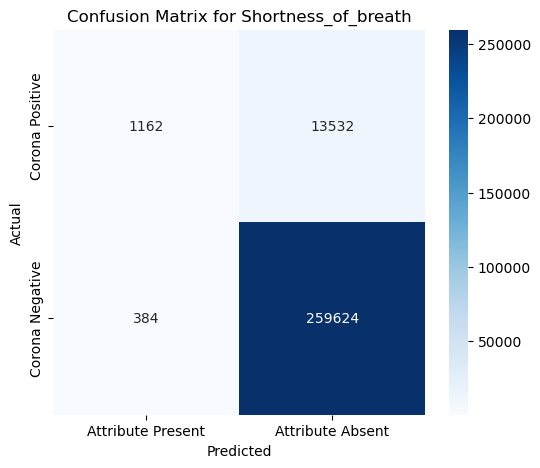


Analyzing the attribute: Headache
Sensitivity: 0.1518
Specificity: 0.9994
Posterior Probability of having the disease given a positive test result (P(Corona | Headache)): 0.9382


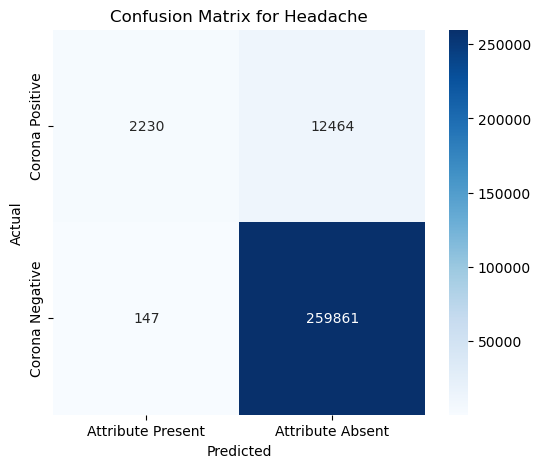

In [15]:
# List of attributes to iterate through
attributes = ["Cough_symptoms", "Fever", "Sore_throat", "Shortness_of_breath", "Headache"]

# Initialize lists to store the values
sensitivity_list = []
specificity_list = []
posterior_probabilities = []

# Iterate through each attribute
for attribute in attributes:
    print(f"\nAnalyzing the attribute: {attribute}")
    
    # Confusion matrix components for each attribute:
    TP = len(df[(df["Corona"] == "positive") & (df[attribute] == True)])  # True Positives
    FN = len(df[(df["Corona"] == "positive") & (df[attribute] == False)])  # False Negatives
    TN = len(df[(df["Corona"] == "negative") & (df[attribute] == False)])  # True Negatives
    FP = len(df[(df["Corona"] == "negative") & (df[attribute] == True)])  # False Positives

    # 2. Calculate sensitivity and specificity for each attribute
    # Sensitivity (True Positive Rate) = TP / (TP + FN)
    # Specificity (True Negative Rate) = TN / (TN + FP)
    sensitivity = TP / (TP + FN) # TP rate - good at identifying people who have the disease
    specificity = TN / (TN + FP) # TN rate - good at identifying people who do not have the disease
    
    # Store sensitivity and specificity
    sensitivity_list.append(sensitivity)
    specificity_list.append(specificity)

    # Display sensitivity and specificity for each attribute
    print(f"Sensitivity: {sensitivity:.4f}")
    print(f"Specificity: {specificity:.4f}")

    
    
    
    
    # 3. Use Bayes' Theorem to determine the posterior probability of having the disease given a positive test result
    # Bayes' Theorem: P(Disease | attribute) = (P(attribute | Disease) * P(Disease)) / P(attribute)
    # Where:
    # P(Disease | attribute) is the posterior probability of having the disease given attribute
    # P(attribute | Disease) is the likelihood, which we can estimate as the proportion of disease cases with attribute

    # Estimate P(attribute | Disease) as the proportion of disease cases with the attribute
    attribute_given_disease = len(df[(df["Corona"] == "positive") & (df[attribute] == True)]) / positive_cases 

    # Estimate P(attribute) as the overall proportion of people with the attribute
    attribute_cases = len(df[df[attribute] == True])
    attribute_probability = attribute_cases / total_cases

    # Calculate P(Disease | attribute) using Bayes' Theorem
    posterior_probability = (attribute_given_disease * prevalence) / attribute_probability 
    
    # Store posterior probability
    posterior_probabilities.append(posterior_probability)

    # Display the posterior probability for each attribute
    print(f"Posterior Probability of having the disease given a positive test result (P(Corona | {attribute})): {posterior_probability:.4f}")
    
    # Visualization 
    # Confusion matrix
    confusion_matrix = np.array([[TP, FN], [FP, TN]])
    
    plt.figure(figsize=(6, 5))
    sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", 
                xticklabels=["Attribute Present", "Attribute Absent"],
                yticklabels=["Corona Positive", "Corona Negative"])
    plt.title(f"Confusion Matrix for {attribute}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


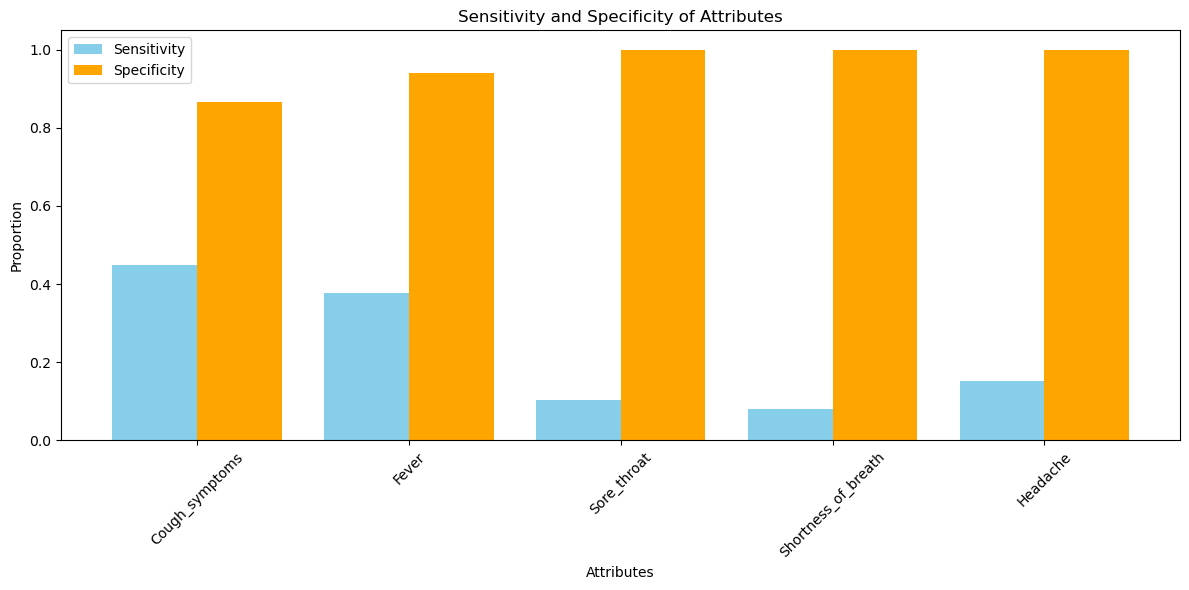

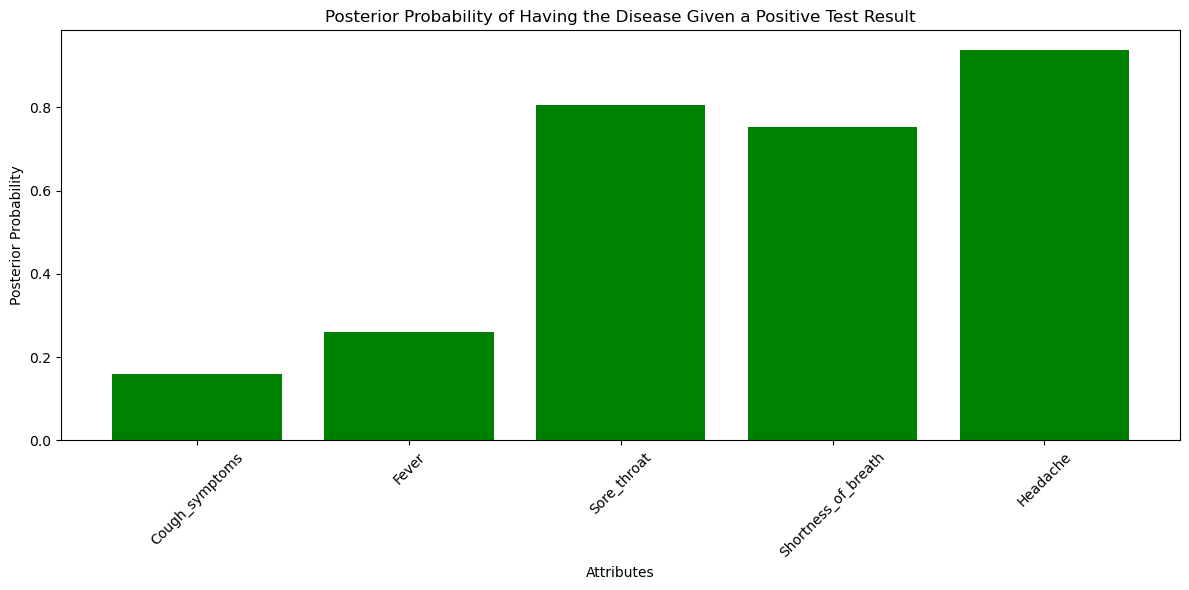

In [16]:
# Visualization
x = np.arange(len(attributes))  # Positions for bar chart

# Bar chart for Sensitivity and Specificity
plt.figure(figsize=(12, 6))
plt.bar(x - 0.2, sensitivity_list, width=0.4, label='Sensitivity', color='skyblue')
plt.bar(x + 0.2, specificity_list, width=0.4, label='Specificity', color='orange')
plt.xticks(x, attributes, rotation=45)
plt.xlabel('Attributes')
plt.ylabel('Proportion')
plt.title('Sensitivity and Specificity of Attributes')
plt.legend()
plt.tight_layout()
plt.show()

# Bar chart for Posterior Probabilities
plt.figure(figsize=(12, 6))
plt.bar(x, posterior_probabilities, color='green')
plt.xticks(x, attributes, rotation=45)
plt.xlabel('Attributes')
plt.ylabel('Posterior Probability')
plt.title('Posterior Probability of Having the Disease Given a Positive Test Result')
plt.tight_layout()
plt.show()

### Explanation (for better understanding only)
1. Sensitivity: A higher sensitivity means that the test is good at detecting the disease in people who actually have it. If sensitivity is high, fewer people with the disease are missed (fewer false negatives).
2. Specificity: A higher specificity means that the test is good at identifying people who do not have the disease. A high specificity leads to fewer false positives.
3. Prevalence: If the disease is rare (low prevalence), even if a test is accurate, the number of true positives might be low. This affects the posterior probability and makes it harder to detect the disease in a population.